In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [11]:
df=pd.read_csv('data.csv')

In [12]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [14]:
simple_linear_reg = df[['T2', 'T6']].sample(100, random_state=2)

C:\Users\USER\Anaconda1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


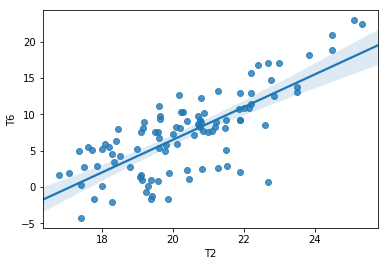

In [15]:
#regression plot
import seaborn as sns
sns.regplot(x="T2", y="T6",
data=simple_linear_reg)

In [16]:
from sklearn.metrics import r2_score
x = df['T2']
y = df['T6']
R_square = r2_score(x,y)
R_square

-35.393237547324794

In [17]:
df = df.drop(columns=['date','lights'])
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Appliances'])
energy_target = normalised_df['Appliances']

C:\Users\USER\Anaconda1\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, energy_target,
test_size=0.3, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [22]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2) 

0.05

In [23]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2) 

45.34

In [24]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

In [25]:
from sklearn.metrics import r2_score
coef_of_determ = r2_score(y_test, predicted_values)
round(coef_of_determ, 3)

0.149

In [26]:
from sklearn.linear_model import Lasso
names = features_df.columns
names

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')

In [46]:
linear_model.fit(x_train, y_train)
predicted_values = linear_model.predict(x_test)
linear = linear_model.fit(x_train, y_train)
coeff2 = linear.coef_

In [47]:
coeff2

array([-3.28105119e-03,  5.53464140e-01, -2.36130440e-01, -4.56606413e-01,
        2.90592950e-01,  9.60417739e-02,  2.89584654e-02,  2.64363744e-02,
       -1.56835322e-02,  1.59925253e-02,  2.36347519e-01,  3.80435393e-02,
        1.03513404e-02, -4.46215072e-02,  1.01969229e-01, -1.57569758e-01,
       -1.89903995e-01, -3.98161915e-02, -3.21793161e-01,  6.82472235e-03,
       -7.76827249e-02,  2.91541364e-02,  1.23130931e-02,  1.17733154e-01,
        1.90281459e+11, -1.90281459e+11])

In [48]:
np.array(features_df.keys())[coeff2!=0]

array(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'], dtype=object)

In [32]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge = ridge_reg.fit(x_test, y_test) 

In [38]:
pred = ridge.predict(x_test)

In [39]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
round(rmse, 3)

0.087

In [35]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso = lasso_reg.fit(x_train, y_train)

In [36]:
coeff = lasso.coef_
coeff

array([ 0.        ,  0.01787993,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.00011004, -0.        , -0.        ,  0.        , -0.        ,
       -0.04955749,  0.00291176,  0.        ,  0.        , -0.        ,
       -0.        ])

In [41]:
pred2 = lasso.predict(x_train)

In [43]:
nrmse = np.sqrt(mean_squared_error(y_train, pred2))
round(nrmse, 3)

0.095